In [1]:
import os
import struct
import numpy as np

import tensorflow as tf
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#定义数据读取函数
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [12]:
train_images, train_labels = load_mnist(r"E:\code\jupyter\fashion-mnist",kind='train')
test_images, test_labels = load_mnist(r'E:\code\jupyter\fashion-mnist',kind='t10k')

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Train set: {} images".format(len(train_images)))
print("Val set: {} images\n".format(len(test_images)))

Train set: 60000 images
Val set: 10000 images



In [14]:
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
#特征值归一化处理
scaler = StandardScaler()
scaler.fit(train_images_pca)
train_images_pca = scaler.transform(train_images_pca)
scaler.fit(test_images_pca)
test_images_pca = scaler.transform(test_images_pca)

In [23]:
train_images = np.reshape(train_images, (train_images.shape[0], -1))
test_images = np.reshape(test_images, (test_images.shape[0], -1))

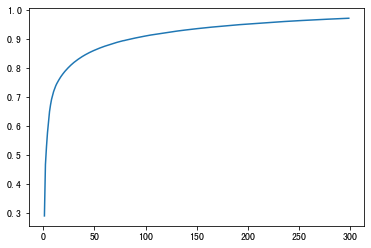

In [24]:
# 画出特征个数和所携带信息数的曲线图
explained_variance_ratio = []
for i in range(1,300): 
    pca = PCA(n_components=i).fit(train_images)
    explained_variance_ratio.append(pca.explained_variance_ratio_.sum())
plt.plot(range(1,300),explained_variance_ratio)
plt.show()

In [25]:
#降维
pca = PCA(n_components = 200)
pca.fit(train_images)
train_images_pca = pca.transform(train_images)
test_images_pca = pca.transform(test_images)

In [26]:
#划分训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(train_images_pca, train_labels, random_state=1, train_size = 0.8)

In [27]:
svc = svm.SVC(kernel = 'rbf', C = 1)
svc.fit(train_x, train_y)

mlp = MLPClassifier(solver = 'lbfgs', activation = 'tanh', alpha = 1e-5, hidden_layer_sizes = [100, 100])
mlp.fit(train_x, train_y)

rdf = RandomForestClassifier(n_estimators = 500, max_depth = 12, random_state = 2)
rdf.fit(train_x, train_y)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomForestClassifier(max_depth=12, n_estimators=500, random_state=2)

In [28]:
result = pd.DataFrame()
result['index'] = ['score_train', 'score_test', 'score_train_pca', 'score_test_pca']
result['svc'] = [svc.score(train_x, train_y), svc.score(test_x, test_y), svc.score(train_images_pca, train_labels), svc.score(test_images_pca, test_labels)]
result['mlp'] = [mlp.score(train_x, train_y), mlp.score(test_x, test_y), mlp.score(train_images_pca, train_labels), mlp.score(test_images_pca, test_labels)]
result['rdf'] = [rdf.score(train_x, train_y), rdf.score(test_x, test_y), rdf.score(train_images_pca, train_labels), rdf.score(test_images_pca, test_labels)]

In [29]:
result

,index,svc,mlp,rdf
0,score_train,0.916562,0.993417,0.925813
1,score_test,0.893417,0.877583,0.843000
2,score_train_pca,0.911933,0.970250,0.909250
3,score_test_pca,0.884400,0.869900,0.835400
